In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [2]:
data=pd.read_csv("Transformed_Housing_Data")
data.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [3]:
sale_price = data['Sale Price'].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)

sample_data=pd.DataFrame({'sale_price': sale_price, 'flat_area': flat_area})

In [4]:
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


No handles with labels found to put in legend.


<function matplotlib.pyplot.show(close=None, block=None)>

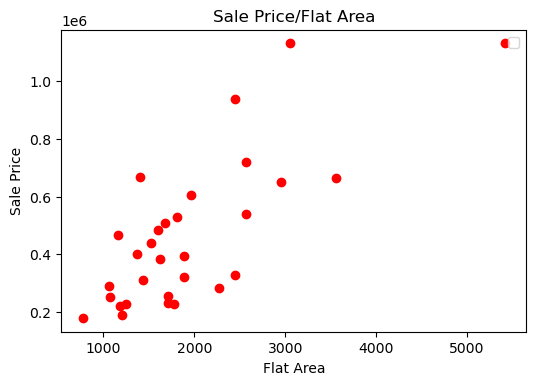

In [5]:
plt.figure(dpi=100)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='red')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale Price/Flat Area')
plt.legend()
plt.show

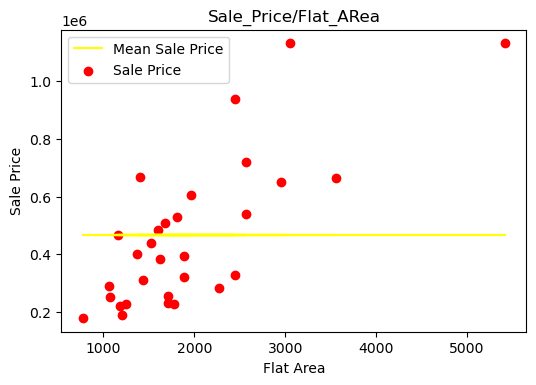

In [6]:
sample_data['mean_sale_price']=sample_data.sale_price.mean()

plt.figure(dpi=100)
plt.scatter(sample_data.flat_area,sample_data.sale_price,color='red', label='Sale Price')
plt.plot(sample_data.flat_area,sample_data.mean_sale_price,color='yellow', label='Mean Sale Price')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.title('Sale_Price/Flat_ARea')
plt.legend()
plt.show()

In [7]:
## the mean regression model says that every new house listed would have the same price irrespective of the flat area which is not correct

#### Linear Regression
It models the linear relationship between the dependent and the independent variables

The one with the least error is the best LR model


Y = mX + c
* X -> Independent Variable
* Y -> Dependent Variable
* m -> Slope
* c -> Intercept

m,c -> parameters of line

As the value of m increases, the rate at which the value of Y increases with respect to X also increases

##### Cost/Lost Function Curve

it is the error corresponding to different models(error corresponding to lines with different slopes)

Text(0.5, 1.0, 'Slope 50 With MSE 184728400708.33334')

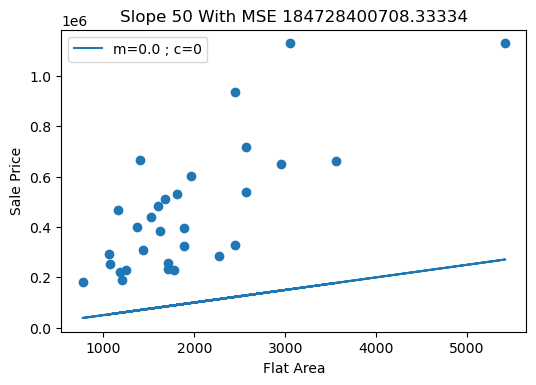

In [8]:
c=0
m=50

line =[]

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i]*m +c)
    
plt.figure(dpi=100)
plt.scatter(sample_data.flat_area,sample_data.sale_price)
plt.plot(sample_data.flat_area,line,label='m=0.0 ; c=0')
plt.xlabel('Flat Area')
plt.ylabel('Sale Price')
plt.legend()
MSE=mse(sample_data.sale_price,line)
plt.title('Slope '+str(m)+' With MSE ' + str(MSE))

In [9]:
def slope_error(slope,intercept,sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        temp=sample_data.flat_area[i] * slope +intercept
        sale.append(temp)
    MSE = mse(sample_data.sale_price,sale)
    return MSE

In [10]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_error(slope=i,intercept=0,sample_data=sample_data)
    Cost.append(cost)

In [11]:
#Arranging in Data frame
Cost_table = pd.DataFrame({
    'slope':slope,
    'cost' :Cost
})
Cost_table.tail()

,slope,cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


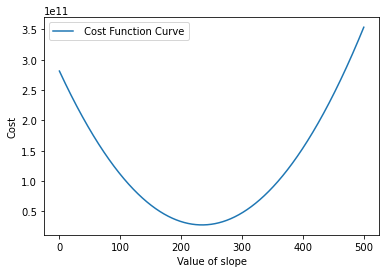

In [12]:
#plotting the cost values corresponding to every value of Beta

plt.plot(Cost_table.slope,Cost_table.cost, label = ' Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

The cost function curve falls under the category of the convex curves

A convex curve has a minimum value at a certain point (Global Minimum)

A non-convex curve does not have a single minimum(Local minimas)

In [13]:
new_slope = Cost_table['slope'][Cost_table['cost']==Cost_table['cost'].min()].values
new_slope[0]

234.3

In [14]:
def intercept_error(slope,intercept,sample_data):
    sale=[]
    for i in range(len(sample_data.flat_area)):
        temp= sample_data.flat_area[i]*slope+intercept
        sale.append(temp)
    MSE = mse(sample_data.sale_price,sale)
    return MSE

In [15]:
intercept = [i for i in range(5000,500000)]
Cost=[]
for i in intercept:
    cost = intercept_error(slope=234,intercept=i,sample_data=sample_data)
    Cost.append(cost)

In [16]:
Cost_table = pd.DataFrame({
    'intercept':intercept,
    'cost' :Cost
})
Cost_table.head()

,intercept,cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


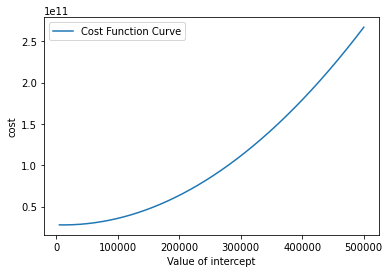

In [17]:
plt.plot(Cost_table.intercept,Cost_table.cost,label='Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('cost')
plt.legend()

In [18]:
new_intercept = Cost_table['intercept'][Cost_table['cost']==Cost_table['cost'].min()].values
new_intercept[0]

10834

In [19]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_error(slope=i,intercept=10834,sample_data=sample_data)
    Cost.append(cost)

In [20]:
#Arranging in Data frame
Cost_table = pd.DataFrame({
    'slope':slope,
    'cost' :Cost
})
Cost_table.tail()

,slope,cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


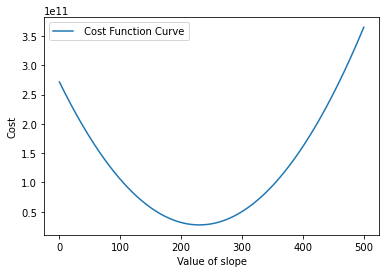

In [21]:
#plotting the cost values corresponding to every value of Beta

plt.plot(Cost_table.slope,Cost_table.cost, label = ' Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [22]:
new_slope = Cost_table['slope'][Cost_table['cost']==Cost_table['cost'].min()].values
new_slope[0]

229.7

the optimumm value of slope would depend on the value of intercept and vice-versa

In [23]:
intercept = [i for i in range(5000,500000)]
Cost=[]
for i in intercept:
    cost = intercept_error(slope=229.7,intercept=i,sample_data=sample_data)
    Cost.append(cost)

In [ ]:
Cost_table = pd.DataFrame({
    'intercept':intercept,
    'cost' :Cost
})
Cost_table.head()

In [ ]:
#plotting the cost values corresponding to every value of Beta

plt.plot(Cost_table.intercept,Cost_table.cost, label = ' Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [ ]:
new_intercept = Cost_table['intercept'][Cost_table['cost']==Cost_table['cost'].min()].values
new_intercept[0]

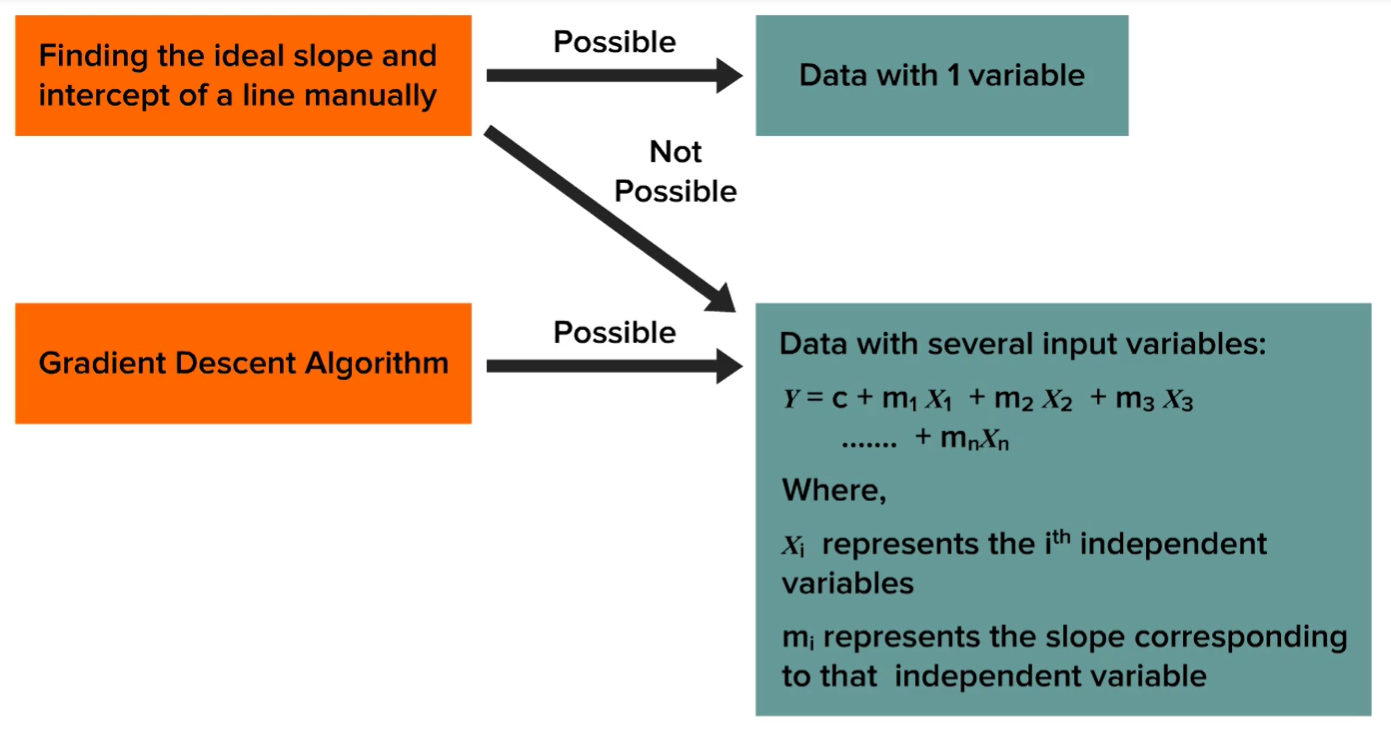